In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [68]:
#drop unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [69]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [70]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [71]:
import seaborn as sns

C:\Users\SAKSHAM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


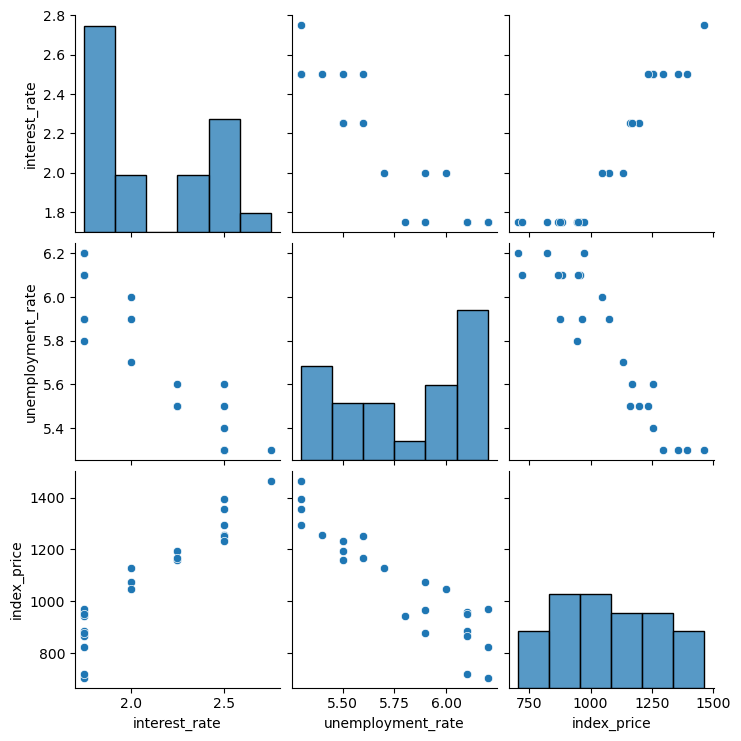

In [72]:
sns.pairplot(df) #this will visually tell how each column is related to each other whether they are related proportionally or not

In [73]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

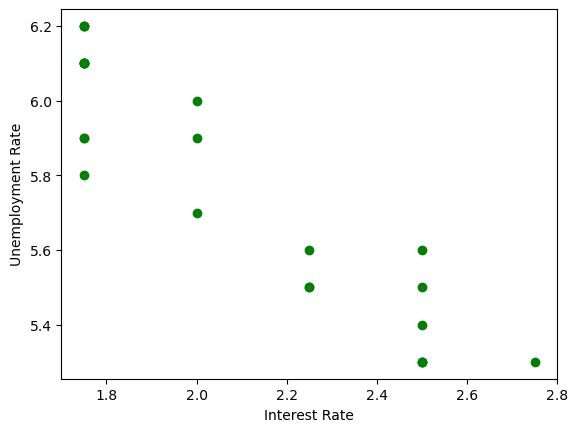

In [74]:
#visualize the datapoint more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='g')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')


In [75]:
#independent and dependent features
X=df.iloc[:,:-1] #is equivalent to df[['interest_rate'],['unemployment_rate']]
Y=df.iloc[:,-1]
print(X.shape)
print(Y.shape)

(24, 2)
(24,)


In [76]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [77]:
Y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [78]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

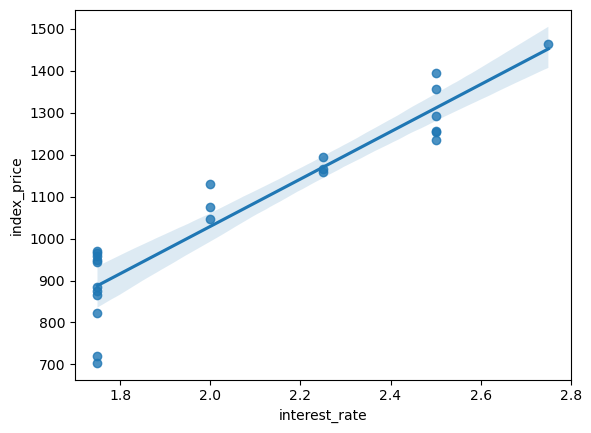

In [79]:
sns.regplot(data=df,x='interest_rate',y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

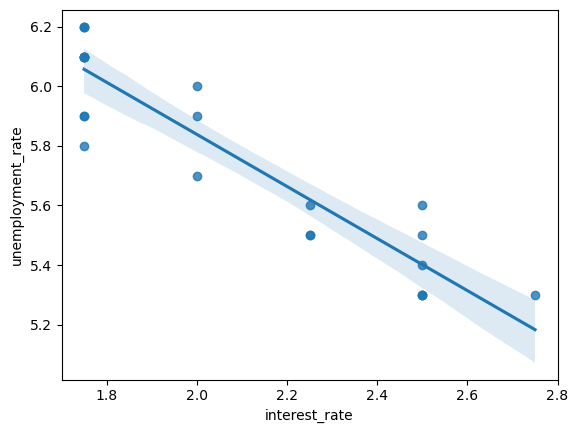

In [80]:
sns.regplot(data=df,x='interest_rate',y='unemployment_rate')

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

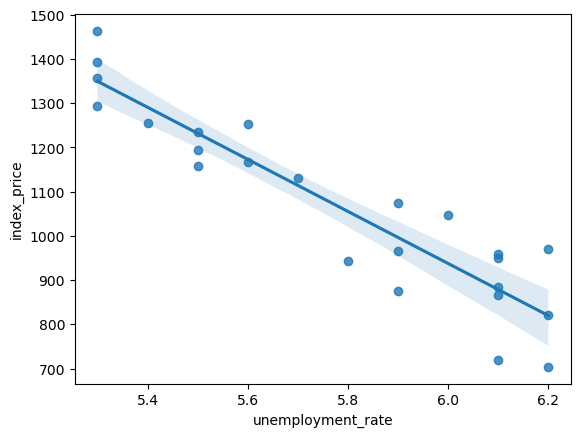

In [81]:
sns.regplot(data=df,x='unemployment_rate',y='index_price')

In [83]:
#Standardization
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [85]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [86]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [87]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression

LinearRegression()

In [88]:
regression.fit(X_train,Y_train)

LinearRegression()

In [89]:
print("Coefficeint:",regression.coef_)
print('Intercept:',regression.intercept_)

Coefficeint: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [90]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [91]:
np.mean(validation_score)

-5914.828180162396

### Prediction of test dataset
y_predict=intercept+coef(X_test)

In [92]:
y_predict=regression.predict(X_test)
y_predict

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [93]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(Y_test,y_predict)
mse=mean_squared_error(Y_test,y_predict)
rmse=np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

59.93578152323556
5793.76288771258
76.11677139574813


### R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares 

In [94]:
#validation
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_predict)
score

0.8278978091457142

### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables 

In [97]:

#Adjusted r2_
1-(1-score)*(len(Y_test-1)/(len(Y_test)-X_test.shape[1]-1))

0.6557956182914284

In [99]:
#using ols
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()


In [100]:
#predict
model.predict(X_test)

array([ 150.78325954, -231.79392541,  353.06855924, -195.73554836,
        -58.53452146,  114.72488249])

In [103]:
model.summary()

C:\Users\SAKSHAM\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 28 Feb 2024   Prob (F-statistic):                       0.754
Time:                        04:10:46   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Assuming you have a StandardScaler named 'scaler' and a LinearRegression model named 'regression'

# Transforming new data points using the scaler
new_data_points_scaled = scaler.transform([[3,5]])

# Predicting the target variable for the scaled data points
predictions = regression.predict(new_data_points_scaled)

# Displaying the predictions
print("Predictions:", predictions)


Predictions: [1579.77240763]


C:\Users\SAKSHAM\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [115]:
residuals = Y_test - y_predict

# Purpose of using residuals:
# Residuals represent the errors or the differences between the actual observed values (Y_test)
# and the values predicted by the regression model (y_predict).

# Residuals can be useful for:
# 1. Checking the model's overall fit: Smaller residuals indicate a better fit.
# 2. Identifying patterns: Residual plots can reveal patterns, helping to identify issues like heteroscedasticity.
# 3. Model improvement: Analyzing residuals may suggest ways to improve the model, such as adding more features.
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

C:\Users\SAKSHAM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


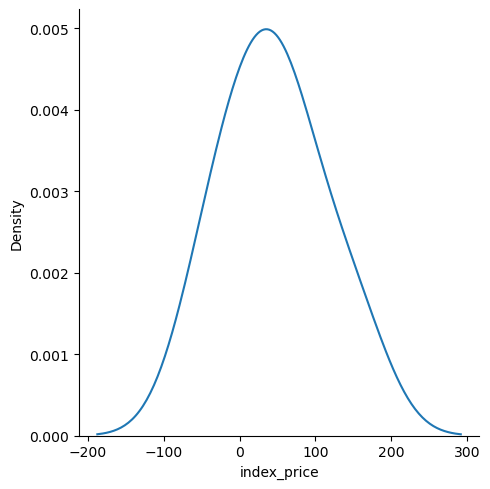

In [116]:
sns.displot(residuals,kind='kde')#it should look more like a normal distribution then it is good for your model

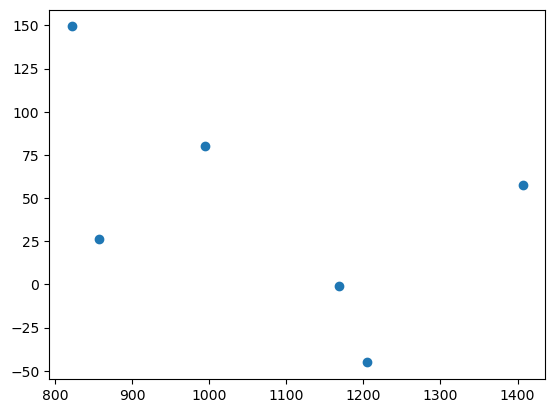

In [118]:
plt.scatter(y_predict,residuals)#it should be uniformly distributed